In [1]:
%load_ext autoreload
%autoreload 2
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

size: 41943 #page:256 #pack/page:256 (min:184 max:276 avg:227.2) space_ratio:0.800 move: 182/41943 0.0043


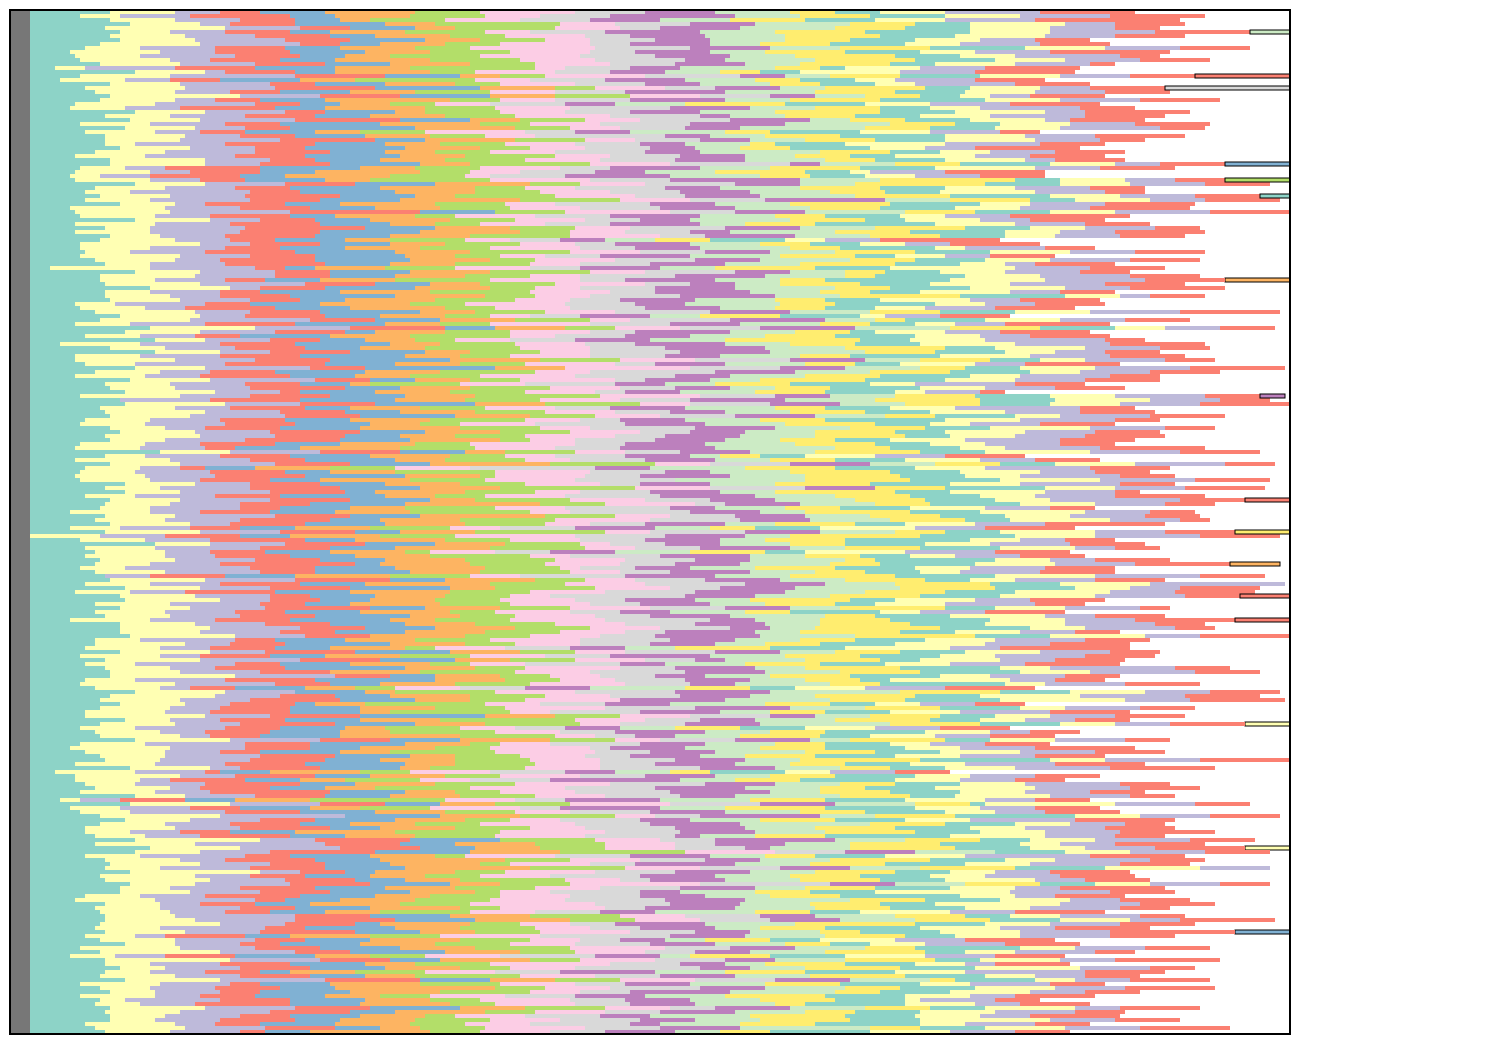

In [36]:
from canvas import Canvas
from colors import Set3
import random
import numpy as np
from phdb import HT

def show_ht(item_size, memory_size, seed=0, ratio=0.8):
    random.seed(seed)
    ht = HT(memory_size, item_size)
    N = int(memory_size * ratio / item_size)
    for i in range(N):
        v = random.randint(0, 0xffffffff)
        ht.put(v)
    ht.reassign_overflows()
    print(ht.stats())
    return ht.render()

show_ht(20, 1024*1024, 0)

calc ratio: 0.7 move_ratio:5.722070844686648e-05
calc ratio: 0.71 move_ratio:0.00010208467655276166
calc ratio: 0.72 move_ratio:0.00016954540637914594
calc ratio: 0.73 move_ratio:0.0002926344942910146
calc ratio: 0.74 move_ratio:0.000421424336933268
calc ratio: 0.75 move_ratio:0.0006472368454515399
calc ratio: 0.76 move_ratio:0.0010227130129250848
calc ratio: 0.77 move_ratio:0.0015444637106762445
calc ratio: 0.78 move_ratio:0.0024294517533134446
calc ratio: 0.79 move_ratio:0.003442947510744121
calc ratio: 0.8 move_ratio:0.0047659919414443416
calc ratio: 0.81 move_ratio:0.006526243907033697
calc ratio: 0.8200000000000001 move_ratio:0.008833244167383871
calc ratio: 0.8300000000000001 move_ratio:0.011544295070665286
calc ratio: 0.8400000000000001 move_ratio:0.014755903723887378
calc ratio: 0.8500000000000001 move_ratio:0.01881563593932322
calc ratio: 0.8600000000000001 move_ratio:0.023416430092264018
calc ratio: 0.8700000000000001 move_ratio:0.02893363734023195
calc ratio: 0.8800000000000

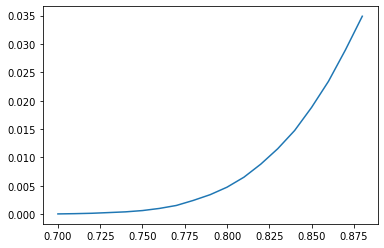

In [59]:
import matplotlib.pyplot as plt

def move_ratio(memory_size, item_size, ratio, seed, show=False):
    random.seed(seed)
    ht = HT(memory_size, item_size)
    N = int(memory_size * ratio / item_size)
    for i in range(N):
        v = random.randint(0, 0xffffffff)
        ht.put(v)
    if show:
        return ht.render()
    try:
        ht.reassign_overflows()
    except:
        print(f'seed: {seed}')
        raise
    return ht.moved_item / ht.nele

def avg_move_ratio(memory_size, item_size, ratio, n):
    rs = [move_ratio(memory_size, item_size, ratio, i) for i in range(n)]
    ret = sum(rs) / len(rs)
    print(f'calc ratio: {ratio} move_ratio:{ret}')
    return ret

ratios = np.arange(0.7, 0.88, 0.01)
move_ratios = [avg_move_ratio(1024*1024, 20, r, 20) for r in ratios]
plt.plot(ratios, move_ratios)

# avg_move_ratio(1024*1024, 20, 0.87, 1000) # 0.028415539429548612
# move_ratio(1024*1024, 20, 0.880000005, 0, False)